In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from sklearn.model_selection import train_test_split


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA


from arch import arch_model

In [23]:
##import machine learning models

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

# Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Importing Random Forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [24]:
daatasources={
    source.replace(".zip",""):source 
    for source in os.listdir("/Users/eduardomartinezacha/Desktop/coding/python/final material/project") 
    if source.endswith(".zip")}
daatasources


{'de-shareprices-daily': 'de-shareprices-daily.zip'}

In [25]:
datasets={}

for key, values in daatasources.items():
    datasets[key]= pd.read_csv(f"/Users/eduardomartinezacha/Desktop/coding/python/final material/project/{values}",sep=';')

In [26]:
import pandas as pd

datasets = {}

for key, values in daatasources.items():
    datasets[key] = pd.read_csv(f"/Users/eduardomartinezacha/Desktop/coding/python/final material/project/{values}", sep=';')

# Combine all DataFrames into one
df = pd.concat(datasets.values(), ignore_index=True)

df['Price_Changes']= df['Open']- df['Close']
df['Price_Changes']

0        0.58
1        1.04
2       -0.43
3       -1.73
4       -1.92
         ... 
39091   -2.88
39092    2.82
39093    2.33
39094    0.00
39095   -0.27
Name: Price_Changes, Length: 39096, dtype: float64

In [27]:
df=pd.DataFrame(df)

In [29]:
vals=['VOW.DE','MBG.DE','BMW.DE','DRI.DE','DTE.DE']
df=df[df['Ticker'].isin(vals)]
df['Date']=pd.to_datetime(df['Date'])
df['log_returns']= np.log(df['Close']/df['Close'].shift(1)).dropna() 
df['log_returns']

7518          NaN
7519    -0.004235
7520     0.000849
7521     0.003025
7522     0.029050
           ...   
39091    0.021768
39092   -0.026803
39093   -0.015597
39094   -0.008196
39095   -0.000136
Name: log_returns, Length: 5599, dtype: float64

In [9]:
df['Ticker'].unique()


In [30]:
portfolio=df.groupby('Date').agg({'Close': 'sum'})
portfolio.columns

Index(['Close'], dtype='object')

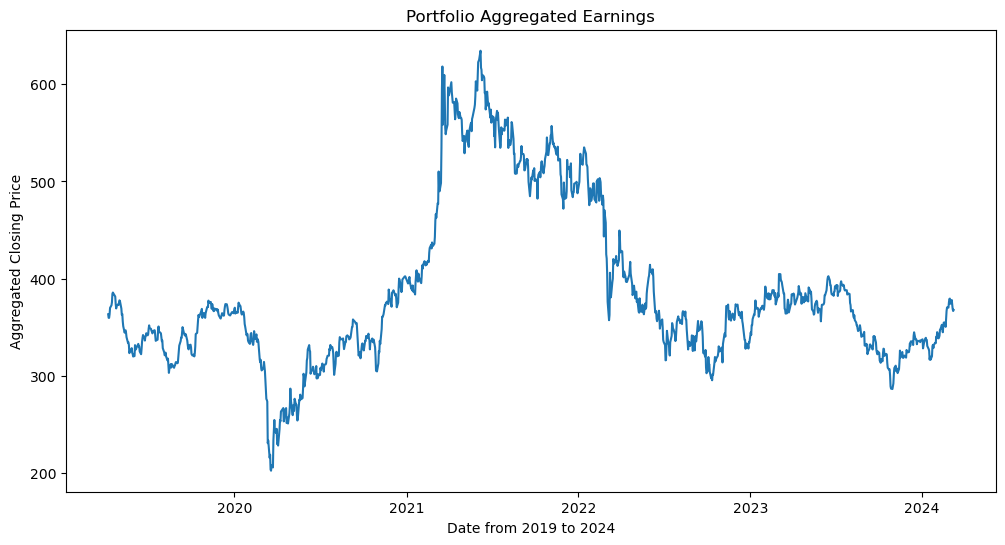

In [31]:
plt.figure(figsize=(12,6))
plt.plot(portfolio.index, portfolio['Close'], linestyle='-')
plt.xlabel('Date from 2019 to 2024')
plt.ylabel('Aggregated Closing Price')
plt.title('Portfolio Aggregated Earnings')
plt.show()


In [12]:
bmw=df[df['Ticker']=='BMW.DE']
dri=df[df['Ticker']=='DRI.DE']
dte=df[df['Ticker']=='DTE.DE']
mbg=df[df['Ticker']=='MBG.DE']
vow=df[df['Ticker']=='VOW.DE']


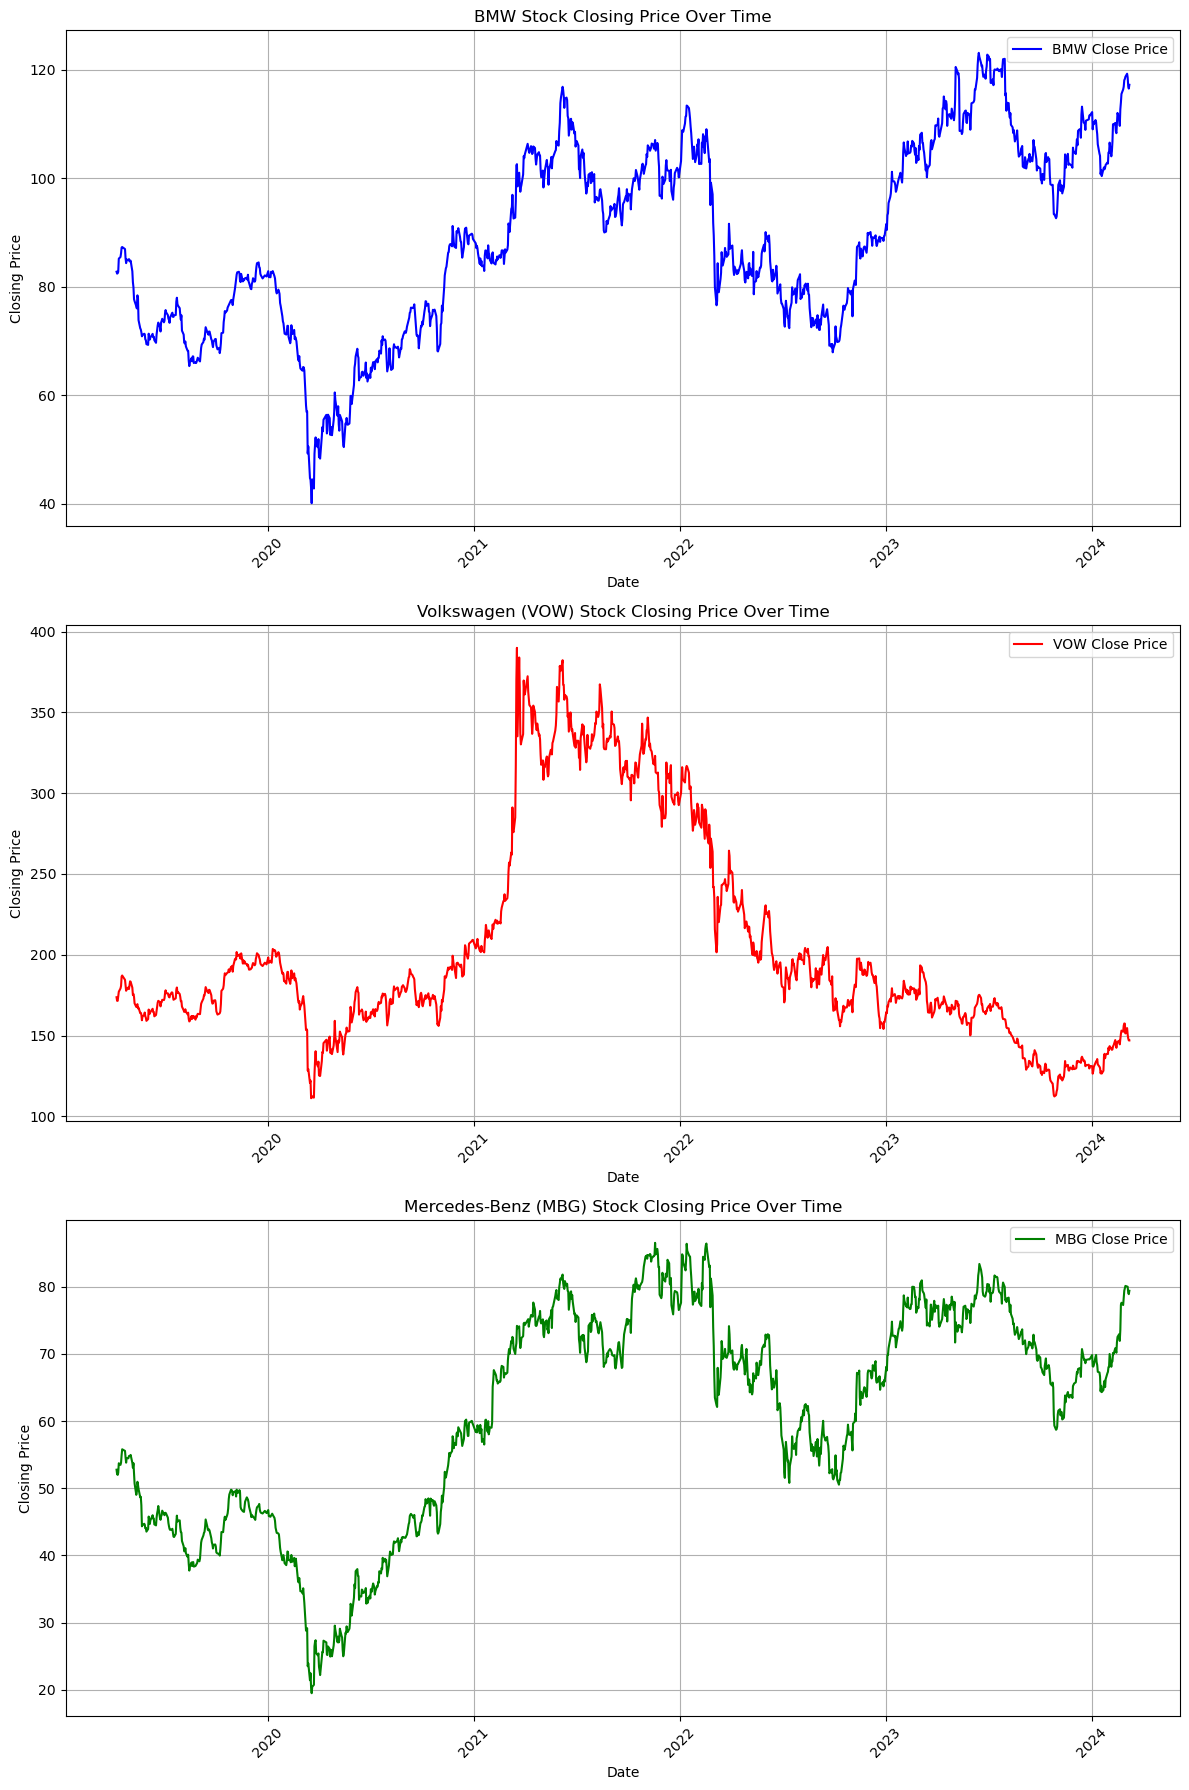

In [13]:
import matplotlib.pyplot as plt

# Create subplots: 3 rows, 1 column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# BMW Stock Closing Price
axes[0].plot(bmw['Date'], bmw['Close'], linestyle='-', label='BMW Close Price', color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
axes[0].set_title('BMW Stock Closing Price Over Time')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Volkswagen (VOW) Stock Closing Price
axes[1].plot(vow['Date'], vow['Close'], linestyle='-', label='VOW Close Price', color='red')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Volkswagen (VOW) Stock Closing Price Over Time')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Mercedes-Benz (MBG) Stock Closing Price
axes[2].plot(mbg['Date'], mbg['Close'], linestyle='-', label='MBG Close Price', color='green')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Closing Price')
axes[2].set_title('Mercedes-Benz (MBG) Stock Closing Price Over Time')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


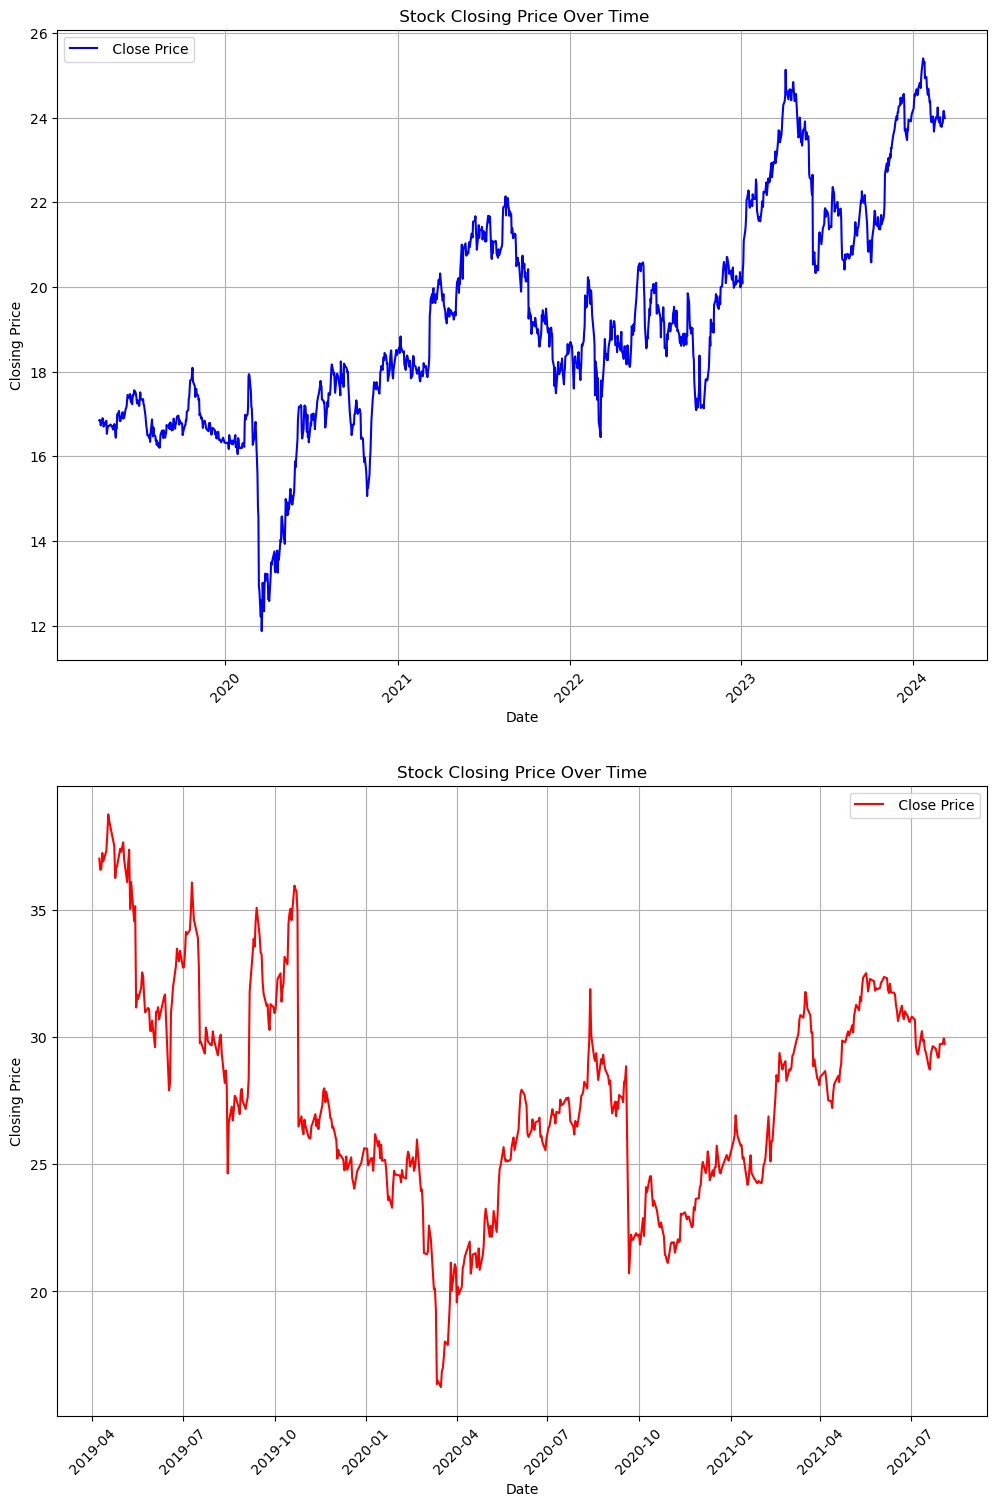

In [14]:
import matplotlib.pyplot as plt

# Create subplots: 3 rows, 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 18))

# BMW Stock Closing Price
axes[0].plot(dte['Date'], dte['Close'], linestyle='-', label=' Close Price', color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
axes[0].set_title(' Stock Closing Price Over Time')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Volkswagen (VOW) Stock Closing Price
axes[1].plot(dri['Date'], dri['Close'], linestyle='-', label=' Close Price', color='red')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Stock Closing Price Over Time')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

### best arch model for the bmw stocks

In [15]:
bmw=bmw[bmw['log_returns'].notnull()]

/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF plot for Closing Price in log format')

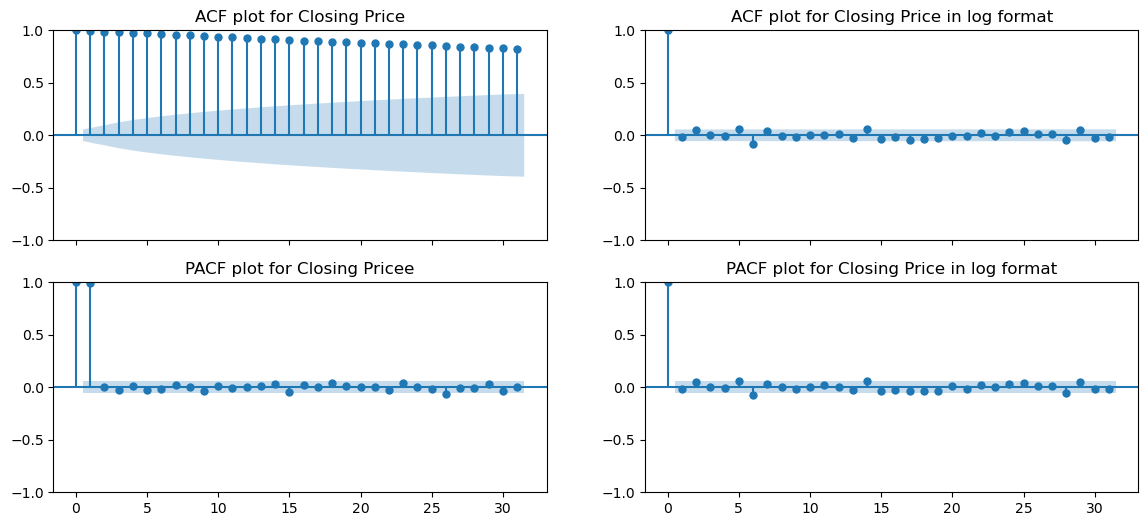

In [16]:
fig, axes=plt.subplots(2,2,figsize=(14,6),sharex=True)
plot_acf( bmw['Close'],ax=axes[0,0])
axes[0,0].set_title('ACF plot for Closing Price')
plot_pacf(bmw['Close'], ax=axes[1, 0])

axes[1,0].set_title('PACF plot for Closing Pricee')
plot_acf( bmw['log_returns'],ax=axes[0,1])
axes[0,1].set_title('ACF plot for Closing Price in log format')
plot_pacf(bmw['log_returns'], ax=axes[1, 1])

axes[1,1].set_title('PACF plot for Closing Price in log format')

In [17]:
bmw_training_data= bmw[bmw['Date']<'2024-02-20']
bmw_testing_data=bmw[bmw['Date']>'2024-02-20']



### get the best combination for all type of arch before computing each model


- Arch best combination for BIC and AIC

In [20]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(bmw_training_data['log_returns'], vol='ARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best BIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(bmw_training_data['log_returns'], vol='ARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # Changed to GARCH
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")


✅ Best (p, q): (9, 1) with AIC: 4992.9365442828075
✅ Best (p, q): (6, 1) with BIC: 5045.004459215373


## GARCH model best combination 

In [43]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(bmw_training_data['log_returns'], vol='GARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(bmw_training_data['log_returns'], vol='GARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")

✅ Best (p, q): (1, 1) with AIC: 4973.314337809606


- egarch best combination


In [169]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(bmw_training_data['log_returns'], vol='EGARCH',p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  


# Initialize best BIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(bmw_training_data['log_returns'], vol='EGARCH',p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_bic = np.inf
best_pq = None  

✅ Best (p, q): (1, 1) with AIC: 4978.659641716329
✅ Best (p, q): (1, 1) with BIC: 5004.265903982552


- gjr_garch bmw model best combnation

In [1]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        for o in range(1,3):
            try:
                model = arch_model(bmw_training_data['log_returns'], vol='GARCH',p=p, q=q,o=o, dist='t').fit(disp='off')  # 
                if model.aic < best_aic:
                     best_aic = model.aic
                     best_pq = (p, q,o)

            except Exception as e:
                    print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  


# Initialize best BIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        for o in range(1,3):
            try:
            # Ensure you use the correct dataset (bmw, not vow)
                model = arch_model(bmw_training_data['log_returns'], vol='GARCH',p=p, q=q,o=1, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
                if model.bic < best_bic:
                    best_bic = model.bic
                    best_pq = (p, q,o)

            except Exception as e:
                 print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_bic = np.inf
best_pq = None  

NameError: name 'np' is not defined

- compute  all models

In [72]:
model_arch_vow_aic = arch_model(bmw_training_data['log_returns'], vol='ARCH',lags=2 ,p=9, q=1, dist='t').fit(disp='off')
model_arch_vow_bic=arch_model(bmw_training_data['log_returns'], vol='ARCH',lags=2 ,p=6, q=1, dist='t').fit(disp='off')
model_garch_vow_aic_bic = arch_model(bmw_training_data['log_returns'], vol='GARCH',lags=2 ,p=1, q=1, dist='t').fit(disp='off')
model_egarch_vow_aic_bic=  arch_model(bmw_training_data['log_returns'], vol='EGARCH',p=1, q=1, dist='t').fit(disp='off')  # 
model_garch_jr_vow_aic_bic=arch_model(bmw_training_data['log_returns'], vol='GARCH',p=1, q=1,o=1 ,dist='t').fit(disp='off') 

### compute summaries for all models of vow

In [107]:
print('the arhc model for aic \n',model_arch_vow_aic.summary())

the arhc model for aic 
                          Constant Mean - ARCH Model Results                         
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -2742.16
Distribution:      Standardized Student's t   AIC:                           5508.33
Method:                  Maximum Likelihood   BIC:                           5569.79
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              13:43:09   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
------------------------------------------------------------

In [108]:
print('the arhc model for bic \n',model_arch_vow_bic.summary())

the arhc model for bic 
                          Constant Mean - ARCH Model Results                         
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -2742.16
Distribution:      Standardized Student's t   AIC:                           5508.33
Method:                  Maximum Likelihood   BIC:                           5569.79
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              13:43:09   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
------------------------------------------------------------

In [109]:
print('model of garch for both aic and aic \n ',model_garch_vow_aic_bic.summary())

model of garch for both aic and aic 
                          Constant Mean - GARCH Model Results                         
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2481.66
Distribution:      Standardized Student's t   AIC:                           4973.31
Method:                  Maximum Likelihood   BIC:                           4998.92
                                              No. Observations:                 1238
Date:                      Sun, Mar 09 2025   Df Residuals:                     1237
Time:                              08:04:38   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
--------------------------------------------

In [110]:
print('model of egarch for both aic and aic \n ',model_egarch_vow_aic_bic.summary())

model of egarch for both aic and aic 
                          Constant Mean - EGARCH Model Results                        
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -2484.33
Distribution:      Standardized Student's t   AIC:                           4978.66
Method:                  Maximum Likelihood   BIC:                           5004.27
                                              No. Observations:                 1238
Date:                      Sun, Mar 09 2025   Df Residuals:                     1237
Time:                              08:04:39   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
-------------------------------------------

In [111]:
print('model for gjr_garch',model_garch_jr_vow_aic_bic.summary())

model for gjr_garch                       Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -2476.75
Distribution:      Standardized Student's t   AIC:                           4965.49
Method:                  Maximum Likelihood   BIC:                           4996.22
                                              No. Observations:                 1238
Date:                      Sun, Mar 09 2025   Df Residuals:                     1237
Time:                              08:04:39   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------

- gjr garch is the best model

- volkswaggen

/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF plot for Closing Price in log format')

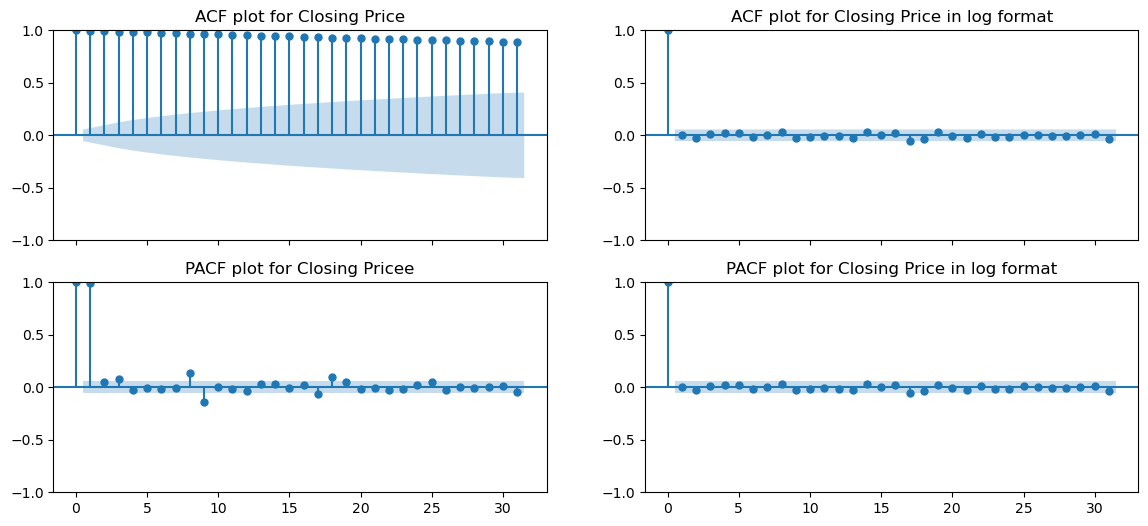

In [112]:
fig, axes=plt.subplots(2,2,figsize=(14,6),sharex=True)
plot_acf( vow['Close'],ax=axes[0,0])
axes[0,0].set_title('ACF plot for Closing Price')
plot_pacf(vow['Close'], ax=axes[1, 0])

axes[1,0].set_title('PACF plot for Closing Pricee')
plot_acf( vow['log_returns'],ax=axes[0,1])
axes[0,1].set_title('ACF plot for Closing Price in log format')
plot_pacf(vow['log_returns'], ax=axes[1, 1])

axes[1,1].set_title('PACF plot for Closing Price in log format')

In [113]:
vow_training_data= vow[vow['Date']<'2024-02-20']
vow_testing_data=vow[vow['Date']>'2024-02-20']

In [114]:
vow_training_data['Date']=pd.to_datetime(vow_training_data['Date'])

/var/folders/1g/fkw2cbkx20bgcrcc0b6yr38w0000gn/T/ipykernel_38890/3264970691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vow_training_data['Date']=pd.to_datetime(vow_training_data['Date'])


- compute the arch models for the volkswaggen

In [141]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(vow_training_data['log_returns'], vol='ARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(vow_training_data['log_returns'], vol='ARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_bic}")
else:
    print("❌ No valid model found.")

✅ Best (p, q): (9, 1) with AIC: 5508.32689149098
✅ Best (p, q): (4, 1) with AIC: 5549.179871250552


In [140]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(vow_training_data['log_returns'], vol='GARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")

# Initialize best AIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(vow_training_data['log_returns'], vol='GARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")

✅ Best (p, q): (9, 1) with AIC: 5510.213425402517
✅ Best (p, q): (1, 1) with BIC: 5544.423325453748


In [117]:
# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        for o in range(1,3):
            try:
                model = arch_model(vow_training_data['log_returns'], vol='GARCH',p=p, q=q,o=o, dist='t').fit(disp='off')  # 
                if model.aic < best_aic:
                     best_aic = model.aic
                     best_pq = (p, q,o)

            except Exception as e:
                    print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  


# Initialize best BIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        for o in range(1,3):
            try:
            # Ensure you use the correct dataset (bmw, not vow)
                model = arch_model(vow_training_data['log_returns'], vol='GARCH',p=p, q=q,o=1, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
                if model.bic < best_bic:
                    best_bic = model.bic
                    best_pq = (p, q,o)

            except Exception as e:
                 print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_bic = np.inf
best_pq = None  

✅ Best (p, q): (1, 1, 2) with AIC: 5511.450465093474
✅ Best (p, q): (1, 1, 1) with BIC: 5544.035605941539


In [118]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(vow_training_data['log_returns'], vol='EGARCH',p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  


# Initialize best BIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(vow_training_data['log_returns'], vol='EGARCH',p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_bic = np.inf
best_pq = None  

✅ Best (p, q): (3, 1) with AIC: 5492.488379098315
✅ Best (p, q): (1, 1) with BIC: 5523.388491813827


- compute  all vow models

In [119]:
model_arch_vow_aic = arch_model(vow_training_data['log_returns'], vol='ARCH',lags=2 ,p=9, q=1, dist='t').fit(disp='off')
model_arch_vow_bic=arch_model(vow_training_data['log_returns'], vol='ARCH',lags=2 ,p=9, q=5, dist='t').fit(disp='off')
model_garch_vow_aic = arch_model(vow_training_data['log_returns'], vol='GARCH',lags=2 ,p=9, q=1, dist='t').fit(disp='off')
model_garch_vow_bic = arch_model(vow_training_data['log_returns'], vol='GARCH',lags=2 ,p=9, q=5, dist='t').fit(disp='off')
model_egarch_vow_aic=  arch_model(vow_training_data['log_returns'], vol='EGARCH',p=3, q=1, dist='t').fit(disp='off')  # 

model_egarch_vow_bic=  arch_model(vow_training_data['log_returns'], vol='EGARCH',p=1, q=1, dist='t').fit(disp='off')  # 
model_garch_jr_vow_aic=arch_model(vow_training_data['log_returns'], vol='GARCH',p=1, q=1,o=2 ,dist='t').fit(disp='off') 
model_garch_jr_vow_bic=arch_model(vow_training_data['log_returns'], vol='GARCH',p=1, q=1,o=1 ,dist='t').fit(disp='off') 

- compute summary of all models.

In [120]:
print("vow_arch_aic\n ",model_arch_vow_aic.summary())

vow_arch_aic
                           Constant Mean - ARCH Model Results                         
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -2742.16
Distribution:      Standardized Student's t   AIC:                           5508.33
Method:                  Maximum Likelihood   BIC:                           5569.79
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:04:51   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------------------------------------

In [121]:
print("vow_arch_bic\n",model_arch_vow_bic.summary())

vow_arch_bic
                          Constant Mean - ARCH Model Results                         
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -2742.16
Distribution:      Standardized Student's t   AIC:                           5508.33
Method:                  Maximum Likelihood   BIC:                           5569.79
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:04:51   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-----------------------------------------------------------------------

In [122]:
print("vow_garch_aic",model_garch_vow_aic.summary())

vow_garch_aic                         Constant Mean - GARCH Model Results                         
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2742.11
Distribution:      Standardized Student's t   AIC:                           5510.21
Method:                  Maximum Likelihood   BIC:                           5576.80
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:04:51   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-----------------------------------------------------------------------

In [123]:
print("vow_garch_bic",model_garch_vow_bic.summary())

vow_garch_bic                         Constant Mean - GARCH Model Results                         
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2742.08
Distribution:      Standardized Student's t   AIC:                           5518.16
Method:                  Maximum Likelihood   BIC:                           5605.23
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:04:51   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-----------------------------------------------------------------------

In [124]:
print("vow_egarch_aic",model_egarch_vow_aic.summary())

vow_egarch_aic                         Constant Mean - EGARCH Model Results                        
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -2739.24
Distribution:      Standardized Student's t   AIC:                           5492.49
Method:                  Maximum Likelihood   BIC:                           5528.34
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:04:52   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------------------------------------

In [125]:
print("vow_egarch_aic",model_egarch_vow_bic.summary())

vow_egarch_aic                         Constant Mean - EGARCH Model Results                        
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -2743.89
Distribution:      Standardized Student's t   AIC:                           5497.78
Method:                  Maximum Likelihood   BIC:                           5523.39
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:04:52   Df Model:                            1
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
--------------------------------------------------------------

In [126]:
print('garch_jr aic model',model_garch_jr_vow_aic)

garch_jr aic model                       Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -2748.73
Distribution:      Standardized Student's t   AIC:                           5511.45
Method:                  Maximum Likelihood   BIC:                           5547.30
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:04:52   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
------------------------------------------------------------------

In [127]:
print('garch_jr aic model',model_garch_jr_vow_bic)

garch_jr aic model                       Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -2750.65
Distribution:      Standardized Student's t   AIC:                           5513.30
Method:                  Maximum Likelihood   BIC:                           5544.04
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:04:52   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
------------------------------------------------------------------

- the best model is gjarch

###  mercedes

Text(0.5, 1.0, 'PACF plot for Closing Price in log format')

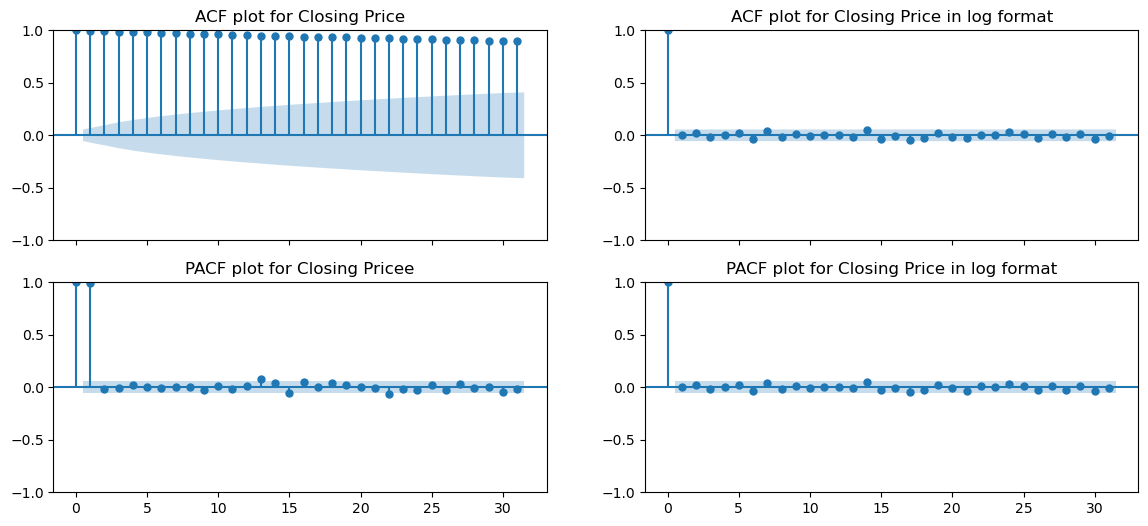

In [130]:
fig, axes=plt.subplots(2,2,figsize=(14,6),sharex=True)
plot_acf( mbg['Close'],ax=axes[0,0])
axes[0,0].set_title('ACF plot for Closing Price')
plot_pacf(mbg['Close'], ax=axes[1, 0])

axes[1,0].set_title('PACF plot for Closing Pricee')
plot_acf( mbg['log_returns'],ax=axes[0,1])
axes[0,1].set_title('ACF plot for Closing Price in log format')
plot_pacf(mbg['log_returns'], ax=axes[1, 1])

axes[1,1].set_title('PACF plot for Closing Price in log format')

In [132]:
mbg_training_data= mbg[mbg['Date']<'2024-02-20']
mbg_testing_data=mbg[mbg['Date']>'2024-02-20']

- find all optimal combination for AIC and BIC

In [ ]:
# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(mbg_training_data['log_returns'], vol='ARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(mbg_training_data['log_returns'], vol='ARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")

✅ Best (p, q): (9, 1) with AIC: 5323.906058156956
✅ Best (p, q): (4, 1) with AIC: 5367.699355656584


In [ ]:
# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(mbg_training_data['log_returns'], vol='GARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(mbg_training_data['log_returns'], vol='GARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")

✅ Best (p, q): (9, 1) with AIC: 5325.436503726032
✅ Best (p, q): (1, 1) with AIC: 5355.450910843292


In [144]:
# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(mbg_training_data['log_returns'], vol='EGARCH',p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(mbg_training_data['log_returns'], vol='EGARCH',p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")

✅ Best (p, q): (8, 1) with AIC: 5307.230873939021
✅ Best (p, q): (1, 1) with BIC: 5332.979636319286


In [151]:
# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        for o in range(1,3):
            try:
                model = arch_model(mbg_training_data['log_returns'], vol='GARCH',p=p, q=q, o=o, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_pq = (p, q,o)

            except Exception as e:
                print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q,o): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best AIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        for o in range(1,3):
            try:
            # Ensure you use the correct dataset (bmw, not vow)
                model = arch_model(mbg_training_data['log_returns'], vol='GARCH',p=p, q=q,o=o, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
                if model.bic < best_bic:
                    best_bic = model.bic
                    best_pq = (p, q,o)
            except Exception as e:
                print(f"❌ Error at (p={p}, q={q}), o={o}: {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q,o): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")

✅ Best (p, q,o): (1, 1, 1) with AIC: 5311.83047582012
✅ Best (p, q,o): (1, 1, 1) with BIC: 5342.562835109895


- compute all models summary

In [155]:
mbg_arch_aic = arch_model(mbg_training_data['log_returns'], vol='ARCH',lags=2 ,p=9, q=1, dist='t').fit(disp='off')  # 
mbg_arch_bic = arch_model(mbg_training_data['log_returns'], vol='ARCH',lags=2 ,p=4, q=1, dist='t').fit(disp='off')  # 

mbg_garch_aic = arch_model(mbg_training_data['log_returns'], vol='GARCH',lags=2 ,p=9, q=1, dist='t').fit(disp='off')  # 
mbg_garch_bic = arch_model(mbg_training_data['log_returns'], vol='GARCH',lags=2 ,p=1, q=1, dist='t').fit(disp='off')  # 

mbg_egarch_aic = arch_model(mbg_training_data['log_returns'], vol='EGARCH',p=8, q=1, dist='t').fit(disp='off')  # 
mbg_egarch_bic= arch_model(mbg_training_data['log_returns'], vol='EGARCH',p=1, q=1, dist='t').fit(disp='off')  # 

mbg_gjr_garch_aic_bic = arch_model(mbg_training_data['log_returns'], vol='GARCH',p=1, q=1,o=1, dist='t').fit(disp='off')  # 


- return summaries and decide which  one is best

In [157]:
print(mbg_arch_aic.summary())

                         Constant Mean - ARCH Model Results                         
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -2649.95
Distribution:      Standardized Student's t   AIC:                           5323.91
Method:                  Maximum Likelihood   BIC:                           5385.37
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:54:34   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

In [158]:
print(mbg_arch_bic.summary())

                         Constant Mean - ARCH Model Results                         
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -2658.92
Distribution:      Standardized Student's t   AIC:                           5331.84
Method:                  Maximum Likelihood   BIC:                           5367.70
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:54:34   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

In [159]:
print(mbg_garch_aic.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2649.72
Distribution:      Standardized Student's t   AIC:                           5325.44
Method:                  Maximum Likelihood   BIC:                           5392.02
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:54:35   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

In [160]:
print(mbg_garch_bic.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2659.92
Distribution:      Standardized Student's t   AIC:                           5329.84
Method:                  Maximum Likelihood   BIC:                           5355.45
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:54:35   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

In [161]:
print(mbg_egarch_aic.summary())

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -2641.62
Distribution:      Standardized Student's t   AIC:                           5307.23
Method:                  Maximum Likelihood   BIC:                           5368.70
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:54:35   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

In [162]:
print(mbg_egarch_bic.summary())

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -2648.68
Distribution:      Standardized Student's t   AIC:                           5307.37
Method:                  Maximum Likelihood   BIC:                           5332.98
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:54:35   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

In [156]:
print(mbg_gjr_garch_aic_bic.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -2649.92
Distribution:      Standardized Student's t   AIC:                           5311.83
Method:                  Maximum Likelihood   BIC:                           5342.56
                                              No. Observations:                 1239
Date:                      Sun, Mar 09 2025   Df Residuals:                     1238
Time:                              14:54:35   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

- best model for mercedes is egarch

### test each model

- bmw

In [168]:
# Generate the forecast
forecast_garch_model_aic_bic = gjr_garch_results.forecast(horizon=13)

# Extract variance forecasts
forecast_garch_model_aic_bic = forecast_garch_model_aic.variance.values[-1]

# Create a DataFrame
df_garch_aic = pd.DataFrame({'Date': date, "Forecasted Variance": forecast_garch_model_aic_bic})

plt.figure(figsize=(12,4))

plt.plot(testing_data['Date'], testing_data['log_returns'],linestyle='-')
plt.plot(forecast_garch_model_aic_bic['Date'], forecast_garch_model_aic_bic["Forecasted Variance"],linestyle='--', color='red')
plt.show()

NameError: name 'gjr_garch_results' is not defined

In [167]:
bmw_testing_data.shape

(13, 13)